In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


In [ ]:
kaggle=pd.read_csv('/content/wine.csv')

In [ ]:
df=pd.DataFrame(kaggle)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['quality']=encoder.fit_transform(df['quality'])

In [ ]:
df['quality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [ ]:
df.columns.isnull().sum()

0

In [17]:
x=df.drop(columns='quality')
y=df['quality']

In [18]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

In [20]:
df.shape

(1599, 12)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
scalerIndex = [i for i in range(0, df.shape[1] - 1)]

x_transformer = ColumnTransformer(transformers=[
    ('standardScaler', StandardScaler(), scalerIndex)],
                               remainder='passthrough')

x_train = x_transformer.fit_transform(x_train)
x_val = x_transformer.transform(x_val)
x_test = x_transformer.transform(x_test)

In [35]:
scalerIndex

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [39]:
x_test.shape

(320, 11)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [42]:
classifier=Sequential()

In [43]:
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [44]:
classifier.add(Dense(units=10,activation='relu'))

In [45]:
classifier.add(Dense(units=10,activation='relu'))

In [46]:
classifier.add(Dense(1,activation='sigmoid'))

In [47]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [54]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [55]:
model_history=classifier.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=10,epochs=30)

Epoch 1/30
103/103 [==============================] - 1s 3ms/step - loss: 0.5907 - accuracy: 0.6843 - val_loss: 0.4979 - val_accuracy: 0.7344
Epoch 2/30
103/103 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7458 - val_loss: 0.4903 - val_accuracy: 0.7875
Epoch 3/30
103/103 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7556 - val_loss: 0.4807 - val_accuracy: 0.7812
Epoch 4/30
103/103 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.7566 - val_loss: 0.4887 - val_accuracy: 0.7844
Epoch 5/30
103/103 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7634 - val_loss: 0.4812 - val_accuracy: 0.7937
Epoch 6/30
103/103 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7674 - val_loss: 0.4815 - val_accuracy: 0.7688
Epoch 7/30
103/103 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7771 - val_loss: 0.4734 - val_accuracy: 0.7594
Epoch 

In [56]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 103}

In [60]:
classifier.get_weights()

[array([[-0.13526458,  0.31952626,  0.65795493, -0.25073296, -1.7206587 ,
         -0.60227644, -0.33049312, -0.56757736, -0.05178504, -0.37946147],
        [-1.2587857 ,  0.23116912,  0.42566898,  0.526192  ,  0.09911307,
         -0.15520883, -0.5212353 ,  0.8703474 ,  0.4129487 , -0.38007647],
        [ 0.26107097,  0.14669363,  0.20695096,  0.73421156, -0.46311224,
          1.1945013 ,  1.0500576 ,  0.29729468,  0.7908176 , -1.4320359 ],
        [-0.62534094,  0.40417343, -0.07027207,  0.5547124 ,  0.402208  ,
         -0.7796772 ,  0.07141408, -0.44341993,  0.21135293,  0.6999702 ],
        [-0.927155  , -0.9155556 ,  0.9501525 ,  1.410313  ,  0.5044164 ,
         -0.47378886,  0.39241046,  0.11307669, -0.5392924 ,  0.66417396],
        [ 0.00292513,  0.6695696 ,  0.64255434, -0.17877683, -0.6048518 ,
          0.03954589, -0.38722736,  1.27467   , -1.9767392 ,  0.02234327],
        [-0.39001024, -0.58324957,  0.31880566, -0.45013008,  0.3619814 ,
         -0.32119218, -1.6277368

In [61]:
pd.DataFrame(model_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.590682,0.684262,0.497924,0.734375
1,0.525257,0.745846,0.490295,0.787500
2,0.505834,0.755621,0.480660,0.781250
3,0.504865,0.756598,0.488665,0.784375
4,0.497676,0.763441,0.481243,0.793750
5,0.492877,0.767351,0.481547,0.768750
6,0.493475,0.777126,0.473409,0.759375
7,0.481357,0.781036,0.482167,0.762500
8,0.479565,0.771261,0.491415,0.728125
9,0.471318,0.780059,0.510766,0.756250


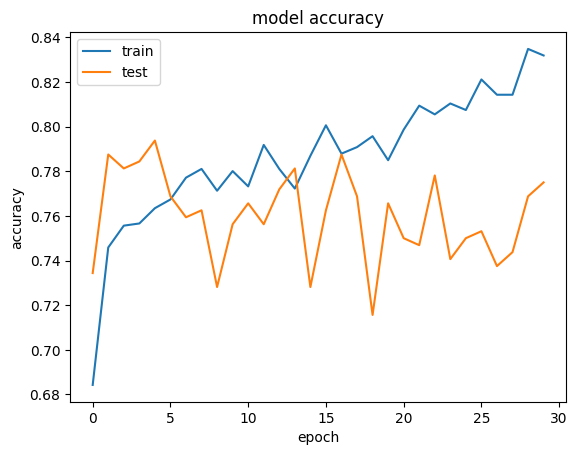

In [64]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
classifier.evaluate(x_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7750


[0.5288353562355042, 0.7749999761581421]

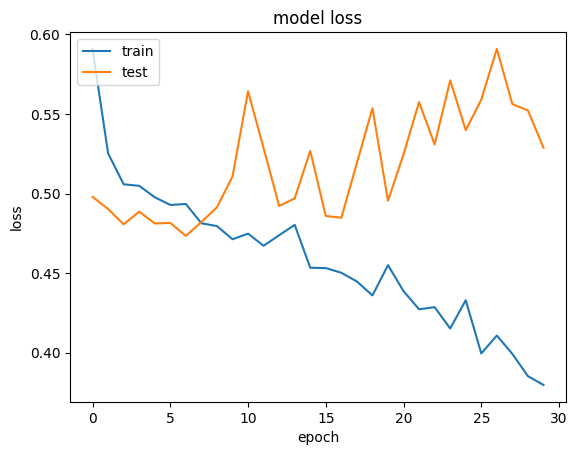

In [65]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()